<a href="https://colab.research.google.com/github/ArshiyaaB/AI-project/blob/main/Foodcasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/sample_data/mcdonalds.csv")


####Step 4 Exploring the Data

In [3]:
data.columns.values #reading columns

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [4]:
data.shape

(1453, 15)

In [5]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Results: variables are not numeric and in the form of YES and NO, thus this YES and NO needs to be changed to 1 and 0 respectively for effcetive analysis of data


In [6]:
df=data.iloc[:,0:11]
df=(df=='Yes').astype(int)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
#now calculate the mean of each column and round off
colm = np.mean(df, axis=0)
rdcolm= np.round(colm, 2)

col_name = df.iloc[:,:11].columns.values

colm = pd.DataFrame({'Column Name': col_name, 'Rounded Mean': rdcolm})

colm

,Column Name,Rounded Mean
yummy,yummy,0.55
convenient,convenient,0.91
spicy,spicy,0.09
fattening,fattening,0.87
greasy,greasy,0.53
fast,fast,0.90
cheap,cheap,0.60
tasty,tasty,0.64
expensive,expensive,0.36
healthy,healthy,0.20


In [8]:
#other way is the Perceptual Map creation for which we can:
from sklearn.decomposition import PCA

pca = PCA()  # Create a PCA object
pca.fit(df)  # Fit the PCA model to the data

# Print summary statistics
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Eigenvectors):\n", pca.components_)
print("Singular Values (Square Roots of Eigenvalues):", np.sqrt(pca.explained_variance_))

Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Principal Components (Eigenvectors):
 [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.2

In [9]:
ld= pca.components_
num= pca.n_features_
pc_list = ["Principal Component"+str(i) for i in list(range(1, num+1))]
ld_df = pd.DataFrame.from_dict(dict(zip(pc_list, ld)))
ld_df['feature'] = df.columns.values[0:11]
ld_df = ld_df.set_index('feature')
ld_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,Principal Component1,Principal Component2,Principal Component3,Principal Component4,Principal Component5,Principal Component6,Principal Component7,Principal Component8,Principal Component9,Principal Component10,Principal Component11
feature,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


Text(0.5, 1.0, 'Correlation')

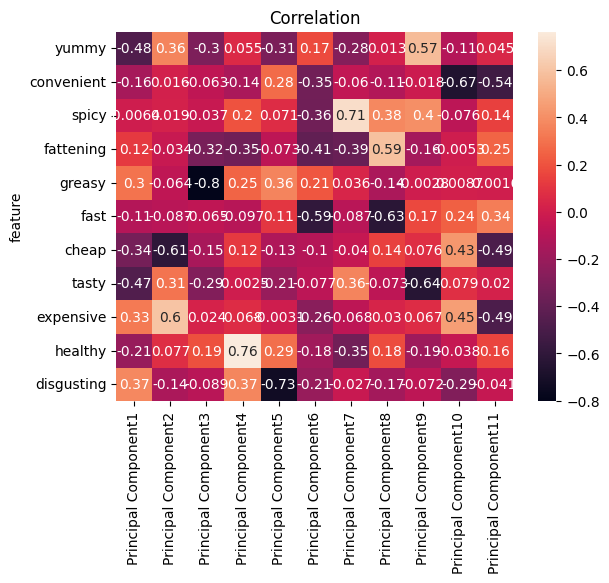

In [14]:
#now find the corelation and make the heatmap
corv=sns.heatmap(ld_df,annot=True)
plt.title('Correlation')

In [15]:
# getting scores
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(df)

# 2D biplot
cluster.biplot(cscore=pca_scores, loadings=ld, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

ModuleNotFoundError: ignored

In [18]:
std = np.sqrt(pca.explained_variance_)
print(f"Standard Deviations: {std}")

Standard Deviations: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


Observation:
* Eigen Values indicate that first two components capture about 50% of the information contained in the segmentation variables.

######STEP 5 Extracting segments
* Using K MEANS

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [20]:
np.random.seed(1234)

In [21]:
cluster_range = range(2, 9)  #cluster range
db_score = []


In [23]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df)

    db_sc = davies_bouldin_score(df, kmeans.labels_)
    db_score.append(db_sc)

    if sil_avg > best_sil_score:
        best_sil_score = sil_avg
        best_kmeans = kmeans

NameError: ignored

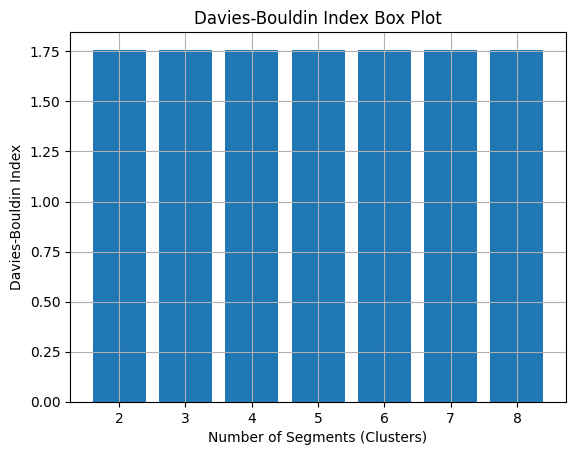

In [24]:
plt.bar(cluster_range, db_score)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Box Plot')
plt.grid(True)
plt.show()

In [25]:

cluster_range = range(2, 9)

# Number of bootstrap replications
n_boot_replicates = 100

# resamples for each bootstrap replicate
n_resamples = 10

ari_scores = []

In [27]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

for _ in range(n_boot_replicates):
    # Bootstrap resampling of the data
    bootstrap_sample = resample(df, n_samples=n_resamples, random_state=1234)

    # Initialize a list to store ARI scores for different cluster numbers
    ari_scores_bootstrap = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)

        # Calculate the ARI to assess cluster stability
        true_labels = np.random.choice(range(k), size=n_resamples)
        ari = adjusted_rand_score(true_labels, kmeans.labels_)
        ari_scores_bootstrap.append(ari)

    ari_scores.append(ari_scores_bootstrap)

{'whiskers': [<matplotlib.lines.Line2D at 0x78b998a89630>,
 'caps': [<matplotlib.lines.Line2D at 0x78b998a89b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x78b998a89390>,
 'medians': [<matplotlib.lines.Line2D at 0x78b998a8a0b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x78b998a8a350>,
 'means': []}

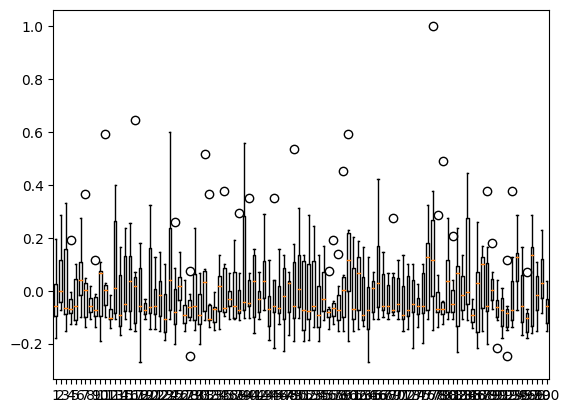

In [28]:
plt.boxplot(ari_scores)